<a href="https://colab.research.google.com/github/oscarfp6/PracticalDeepLearning/blob/main/modercycling_vs_oldcycling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instala las últimas versiones de fastai y gradio
!pip install -U fastai gradio duckduckgo-search

# Importa todo lo necesario de fastai y gradio
from fastai.vision.all import *
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [2]:
from duckduckgo_search import DDGS # <--- Importamos la clase DDGS

In [11]:
def search_images(term, max_images=100):
    """Busca imágenes en DuckDuckGo usando la nueva API"""
    print(f"Buscando imágenes de: {term}")
    with DDGS() as ddgs:
        # ddgs.images() nos da un "generador", lo convertimos a una lista
        results = list(ddgs.images(
            keywords=term,
            max_results=max_images
        ))
    # Extraemos solo la URL de la imagen de cada resultado
    return [r['image'] for r in results]


# --- El resto del código es casi igual ---
path = Path('2000s_vs_2010s')
searches = 'tour de france 2005 cyclist riding', 'tour de france 2023 cyclist riding'
if not path.exists():
    path.mkdir()

# Descarga las imágenes para cada búsqueda usando nuestra nueva función
for o in searches:
    dest = (path/o.split(' ')[0])
    dest.mkdir(exist_ok=True)
    # ¡Aquí usamos nuestra nueva función!
    urls = search_images(o, max_images=50)
    download_images(dest, urls=urls) # Pasamos las URLs a download_images

# Limpiamos las imágenes fallidas (esto no cambia)
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Se eliminaron {len(failed)} imágenes fallidas.")

Buscando imágenes de: tour de france 2005 cyclist riding
Buscando imágenes de: tour de france 2023 cyclist riding
Se eliminaron 0 imágenes fallidas.


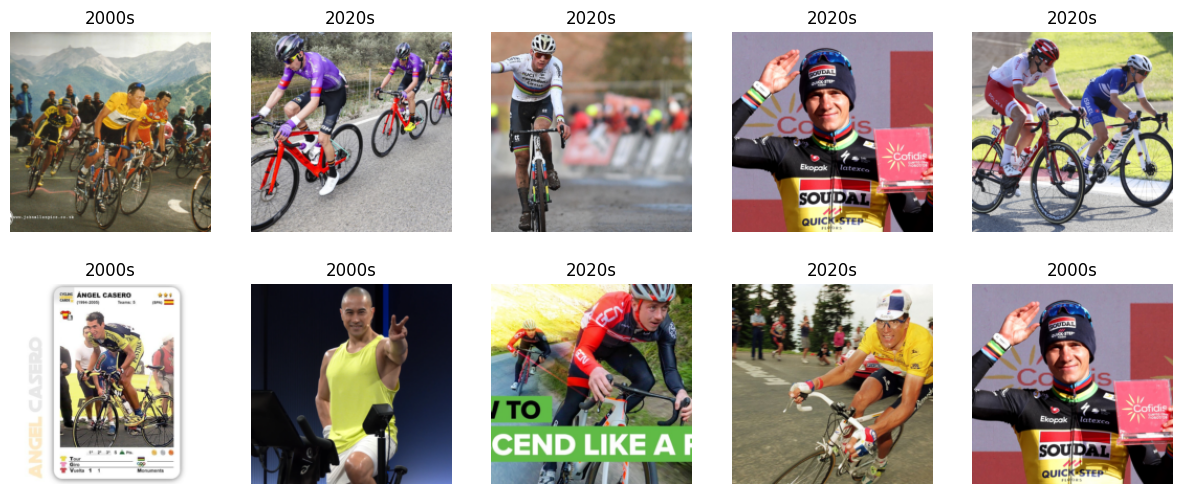

In [12]:
# Creando el "recetario" para nuestros datos con el DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Entrada: Imagen, Salida: Categoría
    get_items=get_image_files,          # Cómo obtener todos los archivos de imagen
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 20% para validación, con semilla para reproducibilidad
    get_y=parent_label,                 # La etiqueta es el nombre de la carpeta padre
    item_tfms=Resize(192)               # Antes de agrupar, redimensiona cada imagen a 192x192
)

# Creamos los DataLoaders a partir del DataBlock y la ruta
dls = dblock.dataloaders(path)

# Es VITAL comprobar nuestros datos. Mostremos un batch del set de validación.
dls.valid.show_batch(max_n=10, nrows=2)